Exploring transforming integrals some more
==========================================

OK, so we talked to Scott and confused ourselves still further. Let's look at a simple example in both the algebraic and numeric domain.

Have to start with some tools.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz

Then let's start with the function
$$f(x)=e^{-(x-2)^{2}}$$
over the domain $0\rightarrow{}4$.
This is a simple quadratic hump that looks like this.

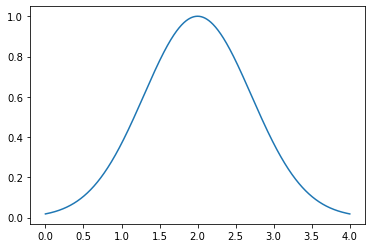

In [4]:
def f(x):
    return np.exp(-(x - 2)**2)

xv = np.linspace(0, 4, 1001)
fv = f(xv)
plt.plot(xv, fv)

We can evaluate the area under that curve using Mathematica to get $\sqrt{\pi} \mathrm{erf}(2) = 1.76416$ or we can integrate it numerically

In [6]:
print(simps(fv, xv))

1.7641627815227596


So far so good.

Now we transform ourselves into a reciprocal space with the transform $z=\frac{1}{x}$ with Jacobian $\frac{dz}{dx}=\frac{-1}{x^{2}}=-z^{2}$. This gives us the new function
$$f'(z)=\dfrac{f(x)}{\frac{dz}{dx}}=\frac{-1}{z^{2}} f(x) = \frac{-1}{z^{2}} e^{-(x-2)^{2}}$$
with the new domain $\infty{} \rightarrow{} 0.25$.

Integrating this function over its correct domain gives us
$$\int_{\infty{}}^{0.25} \frac{-1}{z^{2}} e^{-(x-2)^{2}} dz = \int_{0.25}^{\infty{}} \frac{1}{z^{2}} e^{-(x-2)^{2}} dz =\sqrt{\pi} \mathrm{erf}(2) = 1.76416,$$
exactly as before.

Note that the Jacobian occurs exactly once as it transforms the function $f(x)$ into the corresponding $f'(z)$.

We can plot the new function

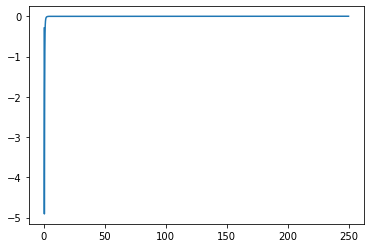

In [10]:
def fp(x):
    return -np.exp(-(1/x - 2)**2)/x**2

zv = 1/xv[1:]
fpv = fp(zv)
plt.plot(zv, fpv)

Note that I had to exclude the point at $x=0$ in order to avoid a divide by error. It truncates the function on the right. Doing the same numerical integral I get

In [11]:
print(simps(fpv, zv))

1.7640769833115737


So the result agrees to within rounding error. It looks a little wierd because everything is back-to-front and upside down but this is only to get the signs right when the order of integration is considered.

This appears to confirm the "put the Jacobian only once" rule.

We can see how the numerical distribution values are related if we transform the $f'(z)$ values back into the x domain.

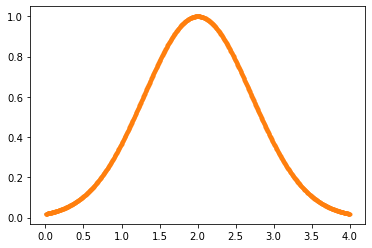

In [14]:
plt.plot(xv, fv)
plt.plot(xv[1:], -fpv / xv[1:]**2, '.')

and so the transformed values lie exactly over the top of the original values.

Averages
--------

The next thing I want to look at it the issue of using these distributions to compute averages. For this I will use only the numeric form as that corresponds most closely to what we have all been doing. Let's start with the simple average value of x. By definition
$$\left< x \right>_{x} = \dfrac{\int x f(x) dx}{\int f(x) dx}$$
where both integrals are over the domain of the distribuition, $0\rightarrow{}4$ for us.

This is very easy to evaluate in the x domain.

In [15]:
xnum = simps(xv * fv, xv)
xdenom = simps(fv, xv)
print(xnum, xdenom, xnum/xdenom)

3.528325563045519 1.7641627815227596 1.9999999999999998


Not terribly surprsingly, the average is 2.

Now, to evaluate this in the z domain we have to make use of the fact that $x = 1/z$ so that
$$\left< x \right>_{z} = \dfrac{\int \dfrac{f(z)}{z} dz}{\int f(z) dz}$$
and the domain is the inverted one of $\infty{} \rightarrow{} 0.25$.

In [16]:
znum = simps(fpv/zv, zv)
zdenom = simps(fpv, zv)
print(znum, zdenom, znum/zdenom)

3.5283250628132774 1.7640769833115737 2.00009698907233


So that we do indeed get the same answer by either method if use the correct form for $x$ and use the correct intensity data set.

It works if find the average of z too, so long as we exclude that pesky point at 0.

In [18]:
xnum1 = simps(fv[1:]/xv[1:], xv[1:])
xdenom1 = simps(fv[1:], xv[1:])
print(xnum1, xdenom1, xnum1/xdenom1)
znum1 = simps(zv*fpv, zv)
zdenom1 = simps(fpv, zv)
print(znum1, zdenom1, znum1/zdenom1)

1.1317732642756826 1.7640889315070567 0.6415624768467946
1.1309653620472264 1.7640769833115737 0.6411088477126136


Note that, as a side-result, we have learned what happens when we use the wrong distribution for the form of the variable as $\left< x \right>_{z} \ne \left< z \right>_{x}$.